# **Imports**

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import re


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [4]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
tweeting_df = pd.read_csv("C:\\Users\\aksha\\Documents\\project final year\\outputfinal (2).csv")

# code initial

In [6]:
tweeting_df.columns=['index','label','tweet']

In [7]:
tweeting_df.pop('index')

0            0
1            1
2            2
3            3
4            4
         ...  
68803    68803
68804    68804
68805    68805
68806    68806
68807    68807
Name: index, Length: 68808, dtype: int64

In [8]:
tweet_df=tweeting_df
tweet_df

,label,tweet
0,0,yeah got 2 backups hate happen strugglin week ...
1,0,hate using bb love iphone havent tried new bb ...
2,1,get fucking real dude
3,1,dirty come crook rengel dems fucking corrupt j...
4,1,fuck could day lets hour ping later sched writ...
...,...,...
68803,1,user judd amp homophobic freemilo milo freemil...
68804,1,lady banned kentucky mall user jcpenny kentucky
68805,1,user omfg im offended im mailbox im proud mail...
68806,1,user user dont balls hashtag say weasel away l...


In [9]:
#tweetingg_df = pd.read_csv('/content/output.csv')

In [10]:
#tweetingg_df.columns

In [11]:
#tweetingg_df.columns=['index','label','tweet']

In [12]:
#tweetingg_df.columns

In [13]:
#tweetingg_df.pop('index')


In [14]:
#tweetingg_df

In [15]:
#tweet_df.columns[:]

In [16]:

##
#twt_dff = pd.read_csv('/content/data1set.csv')

In [17]:
##

#twt_dff.columns[:]

In [18]:
##

#twt_dff.columns[0]

In [19]:
tweet_df.shape

(68808, 2)

<AxesSubplot: xlabel='label', ylabel='count'>

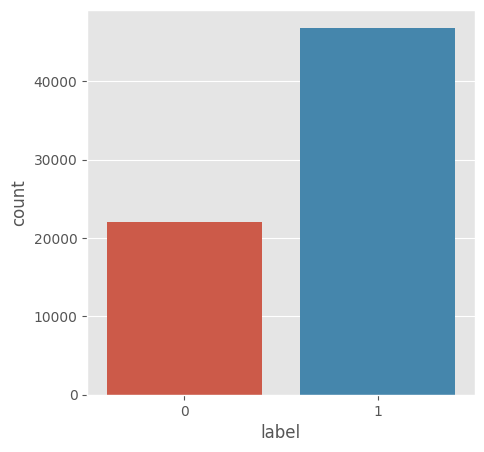

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

In [21]:
tweet_df.head()

,label,tweet
0,0,yeah got 2 backups hate happen strugglin week ...
1,0,hate using bb love iphone havent tried new bb ...
2,1,get fucking real dude
3,1,dirty come crook rengel dems fucking corrupt j...
4,1,fuck could day lets hour ping later sched writ...


In [22]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68808 entries, 0 to 68807
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   68808 non-null  int64 
 1   tweet   68806 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [23]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

yeah got 2 backups hate happen strugglin week nowhandle tho 

hate using bb love iphone havent tried new bb bb provided corp dont get pick model 

get fucking real dude 

dirty come crook rengel dems fucking corrupt joke make republicans look like 

fuck could day lets hour ping later sched writing book 



# preprocessing

In [24]:
def data_processing(tweet):
    tweet = re.sub("\d*\.\d+","",str(tweet)) # convert nu,bers present to strings
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE) #replace https with null-> ''
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub("\d*\.\d+","",tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [27]:
tweet=data_processing("she is an idiot")

In [28]:
print(tweet)

idiot


In [29]:
tweet_df = tweet_df.drop_duplicates('tweet')

<AxesSubplot: xlabel='label', ylabel='count'>

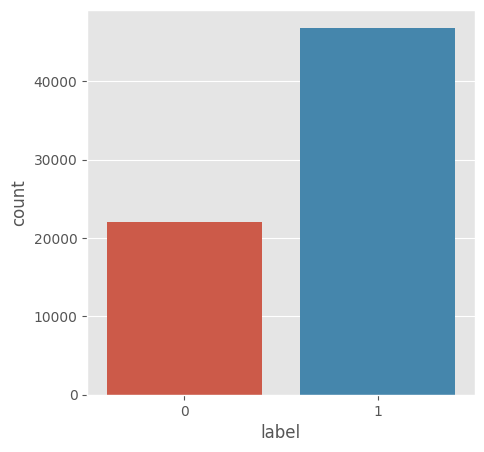

In [30]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

In [31]:
lemmatizer = WordNetLemmatizer() # similar but different frop stemming by considering the literal meaning of the word
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data
#check for renaming tweet to data

In [32]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x)) #replace each tweet by its root word

C:\Users\aksha\AppData\Local\Temp\ipykernel_21288\2335243015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x)) #replace each tweet by its root word


# Visualizing

<Axes: xlabel='label', ylabel='count'>

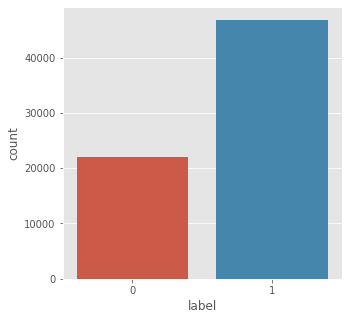

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

In [ ]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

yeah got 2 backups hate happen strugglin week nowhandle tho 

hate using bb love iphone havent tried new bb bb provided corp dont get pick model 

get fucking real dude 

dirty come crook rengel dems fucking corrupt joke make republicans look like 

fuck could day lets hour ping later sched writing book 



In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68806 entries, 0 to 68807
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   68806 non-null  int64 
 1   tweet   68806 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
tweet_df['label'].value_counts()

1    46806
0    22000
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

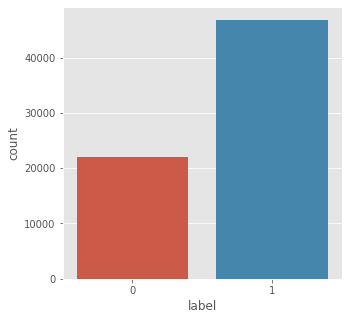

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

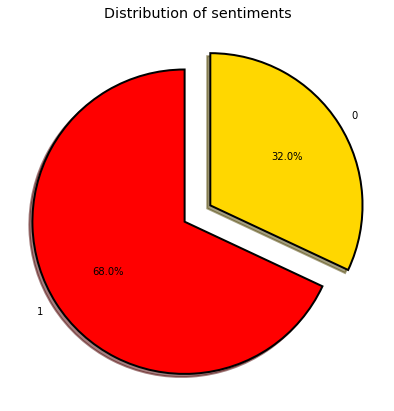

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,label,tweet
0,0,yeah got 2 backups hate happen strugglin week ...
1,0,hate using bb love iphone havent tried new bb ...
9,0,wow lol sounds like lot piss hehehe
10,0,damn thangthe typical rap beef one person worr...
12,0,well damn needed mother time


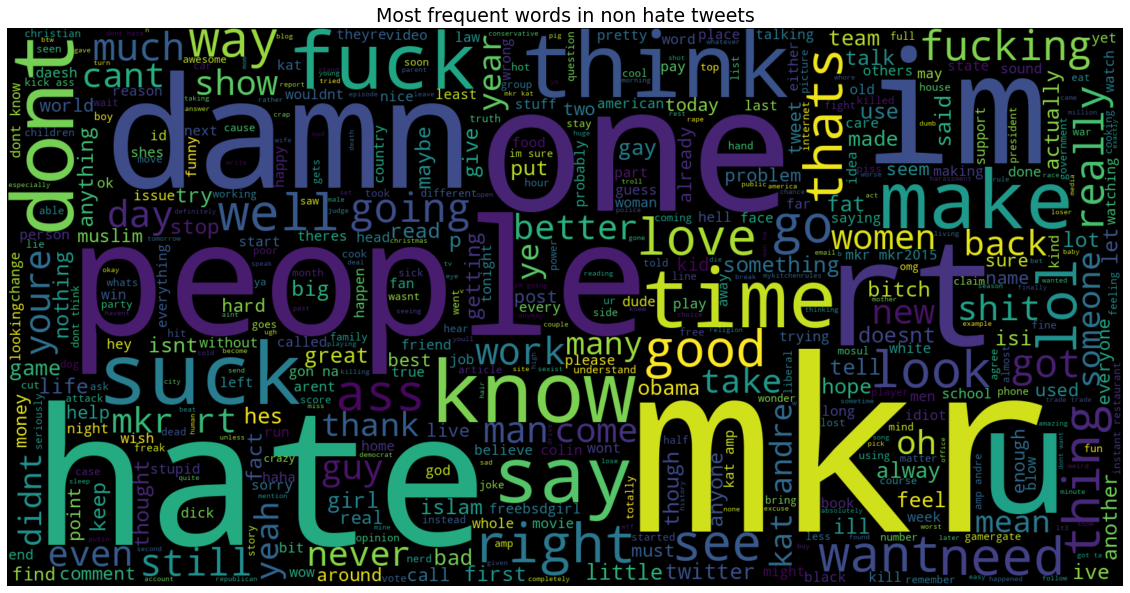

In [ ]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [ ]:
neg_tweets = tweet_df[tweet_df.label == 0]
neg_tweets.head()

,label,tweet
0,0,yeah got 2 backups hate happen strugglin week ...
1,0,hate using bb love iphone havent tried new bb ...
9,0,wow lol sounds like lot piss hehehe
10,0,damn thangthe typical rap beef one person worr...
12,0,well damn needed mother time


In [ ]:
'''text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
#plt.show()'''

"text = ' '.join([word for word in neg_tweets['tweet']])\nplt.figure(figsize=(20,15), facecolor='None')\nwordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)\nplt.imshow(wordcloud, interpolation='bilinear')\nplt.axis('off')\nplt.title('Most frequent words in hate tweets', fontsize = 19)\n#plt.show()"

# TF vector

In [34]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [35]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 626683

First 20 features: 
['000' '000 articles' '000 comp' '000 frankies' '000 mkr' '000 sale'
 '000 seriously' '0007' '00simmerforlife' '00simmerforlife im' '01'
 '01 ad' '01151900' '01151900 soon' '02' '02 feb' '037' '037 hate' '0406'
 '0406 fighting']


In [36]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [37]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 1286942

First 20 features: 
['000' '000 articles' '000 articles skim' '000 comp' '000 comp employees'
 '000 frankies' '000 mkr' '000 mkr httptcokeu7op5cit' '000 sale'
 '000 sale top' '000 seriously' '000 seriously ur' '0007'
 '00simmerforlife' '00simmerforlife im' '00simmerforlife im sexist' '01'
 '01 ad' '01 ad either' '01151900']


In [38]:
print(feature_names)

['000' '000 articles' '000 articles skim' ... 'غنى_قلبي' 'غنى_قلبي mkr'
 'غنى_قلبي mkr none']


In [63]:
pickle.dump(vect, open('vectorizer', 'wb'))



```
# This is formatted as code
```

# Model building

In [39]:
X = tweet_df['tweet']
Y = tweet_df['label']
type((X[0]))

str

In [40]:
vect.transform(['stupid'])

<1x1286942 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [41]:
X = vect.transform(X)

In [42]:
print(tweet_df['tweet'])

0        yeah got 2 backups hate happen strugglin week ...
1        hate using bb love iphone havent tried new bb ...
2                                    get fucking real dude
3        dirty come crook rengel dems fucking corrupt j...
4        fuck could day lets hour ping later sched writ...
                               ...                        
68803    user judd amp homophobic freemilo milo freemil...
68804      lady banned kentucky mall user jcpenny kentucky
68805    user omfg im offended im mailbox im proud mail...
68806    user user dont balls hashtag say weasel away l...
68807                   makes ask anybody god oh thank god
Name: tweet, Length: 68806, dtype: object


In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (55044, 1286942)
Size of y_train: (55044,)
Size of x_test:  (13762, 1286942)
Size of y_test:  (13762,)


In [45]:
print(x_test)

  (0, 1044631)	0.2556829736634844
  (0, 1044630)	0.2556829736634844
  (0, 1044493)	0.15938677753091618
  (0, 871455)	0.2556829736634844
  (0, 871448)	0.22208434663732302
  (0, 864231)	0.15864947089568196
  (0, 782885)	0.2556829736634844
  (0, 782884)	0.2556829736634844
  (0, 782883)	0.2556829736634844
  (0, 505401)	0.2556829736634844
  (0, 505400)	0.2556829736634844
  (0, 505399)	0.2556829736634844
  (0, 403216)	0.2556829736634844
  (0, 403192)	0.18085159979735957
  (0, 402632)	0.13243210745137407
  (0, 194846)	0.2556829736634844
  (0, 194845)	0.2556829736634844
  (0, 194844)	0.2556829736634844
  (1, 1060972)	0.25689672828105536
  (1, 1060971)	0.24779630488929266
  (1, 884360)	0.25689672828105536
  (1, 884359)	0.24133945173675814
  (1, 884289)	0.15191322594574314
  (1, 554564)	0.25689672828105536
  (1, 554563)	0.25689672828105536
  :	:
  (13761, 759660)	0.23528197190619013
  (13761, 759624)	0.15161738352546303
  (13761, 759623)	0.15161738352546303
  (13761, 759539)	0.10530117432718555


In [46]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))



Test accuarcy: 83.07%


In [56]:
import pickle

In [57]:
pickle.dump(logreg, open('logreg', 'wb'))

In [ ]:
#logreg .save("neural_network")

# NVB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
X_over = x_train.toarray()
gnbmodel = gnb.fit(X_over, y_train)

In [ ]:
y_pred = gnbmodel.predict(x_test)


In [ ]:
print ("Score:", gnbmodel.score(x_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

In [47]:
from sklearn.naive_bayes import GaussianNB

import numpy as np

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()



In [48]:
clf.fit(x_train, y_train)



MultinomialNB()

In [49]:
y_pred = clf.predict(x_test)



In [50]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.7149396889986921
Confusion Matrix: 
 [[ 497 3898]
 [  25 9342]]


# **DTC**

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc=DecisionTreeClassifier()

In [60]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_predict=dtc.predict(x_test)

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# from sklearn.metrics import classification_report
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [66]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = plot_precision_recall_curve(model, x_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [67]:
getStatsFromModel(dtc)

              precision    recall  f1-score   support

           0       0.95      0.11      0.20      4395
           1       0.71      1.00      0.83      9367

    accuracy                           0.71     13762
   macro avg       0.83      0.56      0.51     13762
weighted avg       0.78      0.71      0.63     13762



NameError: name 'plot_precision_recall_curve' is not defined

In [68]:
getStatsFromModel(clf)

              precision    recall  f1-score   support

           0       0.95      0.11      0.20      4395
           1       0.71      1.00      0.83      9367

    accuracy                           0.71     13762
   macro avg       0.83      0.56      0.51     13762
weighted avg       0.78      0.71      0.63     13762



NameError: name 'plot_precision_recall_curve' is not defined

In [69]:
pickle.dump(logreg, open('dectree', 'wb'))

# SVM

In [ ]:
#from sklearn.svm import SVC

In [ ]:
#clf = SVC(kernel='linear',c=1).fit(x_train, y_train)
#pred=clf.predict(x_test)

# Measuring

In [ ]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

# Extra code

In [ ]:
pip install scikit-plot

In [ ]:
#from sklearn.svm import SVC

In [ ]:

#Random oversampling on training data
'''from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(x_train, y_train)

In [ ]:

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics





def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  # disp = plot_precision_recall_curve(model, X_test, y_test)
  disp = skplt.metrics.plot_precision_recall(y_train, y_pred)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()




# Model, SVM
from sklearn import svm


clf = svm.SVC(kernel='linear', verbose=True)
clf.fit(X_over, y_over)
y_pred = clf.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(clf)







#Supervised Methods
# 3 normal methods
# 2 ensemble methods
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
X_over = X_over.toarray()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(x_test)
print ("Score:", gnbmodel.score(x_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)
'''

'\n\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\nfrom sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.model_selection import train_test_split\n\nfrom nltk.stem.porter import PorterStemmer\nimport nltk\nimport re, string\nfrom nltk.corpus import stopwords\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import LinearSVC\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.tree import DecisionTreeClassifier\n\nfrom sklearn.model_selection import cross_val_score\n\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import precision_recall_curve\nimport scikitplot as skplt\nimport matplotlib.py

# Testing user input

```
# This is formatted as code
```



In [70]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer, WordNetLemmatizer
import pickle

In [71]:
#from tensorflow.keras import models
#model = models.load_model("neural_network")

In [81]:
def custom_input_prediction(text):
    import nltk
    nltk.download('omw-1.4')
    #print(text)
    #text = pd.Series(text)
    #print(text)
    text = str(data_processing(text))
    print(text)
    text = [text]
    print(text)
    vectoriser = pickle.load(open("vectorizer", "rb"))
    text = vectoriser.transform(text)
    model = pickle.load(open("logreg", "rb"))
    prediction = model.predict(text)
    #print(prediction)
    prediction = prediction[0]
    #print(prediction)
    interpretations = {
        0 : "not bully",
        1 : "bully"
      
    }

    for i in interpretations.keys():
        if i == prediction:
            return interpretations[i]

In [82]:
something = "My Grandsons are angry about this gender free crap too! 2 in primary 2 @at high school T.he is 16 yr old ASD &amp; got bullied as did a girl in his SEN base. He had to step in as teachers to busy on phones playing games, wee lass would have had nowhere to run if loos unisex!"
something_2 = "But for u its Hinduphobia isnt it? When kashmiri pandits get killed, when a hindu girl gets raped by islamists, when radical islamic terrorism kill people in the world,u still keep quiet as if nothing is happening;but jump on when some1 says anything against islam!! #Hinduphobic"
new_something = "There was certainly a more ""acceptable"" time for them to be made though in the eyes of our world at large (which also includes other jokes like rape, gaybashing, etc.) Shit, try watching Friends or Seinfeld and watch how many times they throw gay people under the bus for a laugh."
sentence="good"
print(custom_input_prediction(sentence))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


good
['good']
not bully


In [76]:
text="i agree"
text=[text[0],]
print(text)

['i']
